In [2]:
import pandas as pd

df=pd.read_pickle('broad_topic_df.pickle')
topics_dict = {
    'Technology/equipment': 'TECHNOLOGY',
    'Media/entertainment': 'TECHNOLOGY',
    'Internet and media': 'TECHNOLOGY',
    'Children': 'TECHNOLOGY',
    'Jobs & Institutions': 'JOB AND ECONOMY',
    'Finance and wealth': 'JOB AND ECONOMY',
    'Information and knowledge': 'JOB AND ECONOMY',
    'Brand/Product': 'JOB AND ECONOMY',
    'Social setting/impact': 'SOCIETY',
    'Language and communication': 'SOCIETY',
    'Family': 'SOCIETY',
    'Relationships': 'SOCIETY',
    'Culture': 'CULTURE',
    'Society & Culture': 'CULTURE',
    'Groups/Names': 'CULTURE',
    'Threat or Risk': 'VIOLENCE',
    'Insult': 'VIOLENCE',
    'Aggression and Violence': 'VIOLENCE',
    'Health Medicine': 'HEALTH',
    'Addictions/Drugs': 'HEALTH',
    'Food and drink': 'HEALTH',
    'Fitness and Skills': 'HEALTH',
    'Crime': 'LEGALITY',
    'Law and regulation': 'LEGALITY',
    'Safety': 'LEGALITY',
    'Life': 'ABSTRACT CONCEPT',
    'Death': 'ABSTRACT CONCEPT',
    'Abstraction': 'ABSTRACT CONCEPT',
    'Negative sentiments': 'ABSTRACT CONCEPT',
    'Identity': 'ABSTRACT CONCEPT',
    'Claim/Opinion': 'ABSTRACT CONCEPT',
    'Personal traits/taste': 'ABSTRACT CONCEPT',
    'Emotions': 'ABSTRACT CONCEPT',
    'Moral issues': 'ABSTRACT CONCEPT',
    'Behavior & Attitude': 'ABSTRACT CONCEPT',
    'Sexuality': 'SEXUALITY',
    'Gender': 'GENDER ISSUE',
    'Religion': 'DISCRIMINATION',
    'Race or ethnicity': 'DISCRIMINATION',
    'Racial stereotypes': 'DISCRIMINATION',
    'Locations/Geography': 'GEOPOLITICAL ISSUE',
    'Politics': 'GEOPOLITICAL ISSUE',
    'Geopolitics/National Issue': 'GEOPOLITICAL ISSUE',
    'War': 'GEOPOLITICAL ISSUE',
    'Environment': 'GEOPOLITICAL ISSUE',
    'Migration': 'GEOPOLITICAL ISSUE',
    'Time & Events': 'OTHER',
    'History': 'OTHER',
    'Animals': 'OTHER',
    'Personal tastes & Art': 'OTHER'
}


In [3]:
import ast 

conflicts=0

df=pd.read_pickle('broad_topic_df.pickle')
for topics in df['topics']:
    aggregations=[]
    topics=ast.literal_eval(topics)
    previous_topic=''

    for t in topics:
        #print(type(topics))
        macro_topic=topics_dict[t]
        aggregations.append(macro_topic)

    if len(aggregations)>1 and aggregations[0]==aggregations[1]:
        conflicts=conflicts+1
        print(aggregations)
        for t in topics:
            print(t)


print("total number of sentences",len(df))
print("conflicts", conflicts)

['DISCRIMINATION', 'DISCRIMINATION']
Race or ethnicity
Religion
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Personal traits/taste
Identity
['DISCRIMINATION', 'DISCRIMINATION']
Racial stereotypes
Race or ethnicity
['GEOPOLITICAL ISSUE', 'GEOPOLITICAL ISSUE']
Geopolitics/National Issue
Environment
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Identity
Emotions
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Claim/Opinion
Personal traits/taste
['DISCRIMINATION', 'DISCRIMINATION']
Racial stereotypes
Race or ethnicity
['GEOPOLITICAL ISSUE', 'GEOPOLITICAL ISSUE']
Geopolitics/National Issue
Politics
['GEOPOLITICAL ISSUE', 'GEOPOLITICAL ISSUE']
Geopolitics/National Issue
Migration
['DISCRIMINATION', 'DISCRIMINATION']
Racial stereotypes
Race or ethnicity
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Personal traits/taste
Identity
['DISCRIMINATION', 'DISCRIMINATION']
Race or ethnicity
Religion
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Claim/Opinion
Personal traits/taste
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Behav

In [21]:
import pandas as pd
import ast
df=pd.read_csv('broad_topic_df.csv')

df['TECHNOLOGY']=None
df['JOB AND ECONOMY']=None
df['SOCIETY']=None
df['CULTURE']=None
df['VIOLENCE']=None
df['HEALTH']=None
df['LEGALITY']=None
df['SEXUALITY']=None
df['GENDER ISSUE']=None
df['ABSTRACT CONCEPT']=None
df['DISCRIMINATION']=None
df['GEOPOLITICAL ISSUE']=None
df['OTHER']=None

print(df.columns)
for index, row in df.iterrows():
    topics=ast.literal_eval(row['topics'])
    for t in topics:
        #print(type(topics))
        macro_topic=topics_dict[t]
    
        row[macro_topic]= t
        df.iloc[index]=row

df.head()



Index(['text', 'sentence_number', 'topics', 'label', 'TECHNOLOGY',
       'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH',
       'LEGALITY', 'SEXUALITY', 'GENDER ISSUE', 'ABSTRACT CONCEPT',
       'DISCRIMINATION', 'GEOPOLITICAL ISSUE', 'OTHER'],
      dtype='object')


,text,sentence_number,topics,label,TECHNOLOGY,JOB AND ECONOMY,SOCIETY,CULTURE,VIOLENCE,HEALTH,LEGALITY,SEXUALITY,GENDER ISSUE,ABSTRACT CONCEPT,DISCRIMINATION,GEOPOLITICAL ISSUE,OTHER
0,social services have a love/hate relationship ...,0,"['Health Medicine', 'Jobs & Institutions']",nothate,None,Jobs & Institutions,None,None,None,Health Medicine,None,None,None,None,None,None,None
1,Yes it's a joke and offensive isn't it? Why ar...,1,"['Gender', 'Social setting/impact']",nothate,None,None,Social setting/impact,None,None,None,None,None,Gender,None,None,None,None
2,"I do not have passions in life, and I'm not su...",2,"['Claim/Opinion', 'Relationships']",nothate,None,None,Relationships,None,None,None,None,None,None,Claim/Opinion,None,None,None
3,You better be. That was the most half-assed co...,3,"['Culture', 'Language and communication']",nothate,None,None,Language and communication,Culture,None,None,None,None,None,None,None,None,None
4,"Waging war on, and bombing, a foreign sovereig...",4,"['Race or ethnicity', 'War']",hate,None,None,None,None,None,None,None,None,None,None,Race or ethnicity,War,None


In [30]:
merged_df=pd.read_csv('merged_df.csv')
topics_and_labels= pd.merge(df, merged_df, on='text', how='inner')


name_counts = topics_and_labels['text'].value_counts()

# Filter the DataFrame to remove rows where the count is 1
duplicates = topics_and_labels[topics_and_labels['text'].isin(name_counts[name_counts > 1].index)]

print(duplicates)

print(len(df))
print(len(merged_df))
print(len(topics_and_labels))


topics_and_labels = topics_and_labels.drop(columns=['topics_y','label_x', 'topics_x','sentence_number_x'])
topics_and_labels.head()

                                                    text  sentence_number_x  \
6                        I'm so bored of my shitty house                  1   
7                        I'm so bored of my shitty house                  1   
9                        I'm so bored of my shitty house                  3   
10                       I'm so bored of my shitty house                  3   
936    Also, answer this question. Is it racist, to t...                 10   
...                                                  ...                ...   
12239  I've known this happen with many women I was i...                  7   
12240  I've known this happen with many women I was i...                  7   
12241  I've known this happen with many women I was i...                  7   
12242  i must also be race blind since I dont see dif...                  8   
12243  i must also be race blind since I dont see dif...                  8   

                                  topics_x  label_x

,text,TECHNOLOGY,JOB AND ECONOMY,SOCIETY,CULTURE,VIOLENCE,HEALTH,LEGALITY,SEXUALITY,GENDER ISSUE,ABSTRACT CONCEPT,DISCRIMINATION,GEOPOLITICAL ISSUE,OTHER,Unnamed: 0,sentence_number_y,label_y
0,social services have a love/hate relationship ...,None,Jobs & Institutions,None,None,None,Health Medicine,None,None,None,None,None,None,None,0,0,nothate
1,Yes it's a joke and offensive isn't it? Why ar...,None,None,Social setting/impact,None,None,None,None,None,Gender,None,None,None,None,1,1,nothate
2,"I do not have passions in life, and I'm not su...",None,None,Relationships,None,None,None,None,None,None,Claim/Opinion,None,None,None,2,2,nothate
3,You better be. That was the most half-assed co...,None,None,Language and communication,Culture,None,None,None,None,None,None,None,None,None,3,3,nothate
4,"Waging war on, and bombing, a foreign sovereig...",None,None,None,None,None,None,None,None,None,None,Race or ethnicity,War,None,4,4,hate


# NOT FINETUNED MODEL

## FALSE POSITIVE ANALYSIS

In [42]:
from divexplorer import DivergenceExplorer
from divexplorer.outcomes import get_false_positive_rate_outcome, get_accuracy_outcome

predictions=pd.read_csv("classified_sentences.csv")
predictions['text'] = predictions['text'].str.replace("^'", "", regex=True)
predictions['text'] = predictions['text'].str.replace("'$", "", regex=True)
predictions['text'] = predictions['text'].str.replace("^\"", "", regex=True)
predictions['text'] = predictions['text'].str.replace("\"$", "", regex=True)

#replace the " with ' 
predictions['text'] = predictions['text'].str.replace("\"", "'", regex=True)

final_df= pd.merge(topics_and_labels, predictions, on='text', how='inner')
""" print(len(final_df))

name_counts = predictions['text'].value_counts()

# Filter the DataFrame to remove rows where the count is 1
duplicates = predictions[predictions['text'].isin(name_counts[name_counts > 1].index)]

print(len(duplicates))
left_out_senteces= pd.merge(topics_and_labels, predictions, on ='text', how='left')
#print(topics_and_labels.iloc[192]['text'])
print(left_out_senteces[left_out_senteces['label'].isnull()].iloc[1]['text'])
"""

final_df = final_df.drop_duplicates(subset='text')
print("final length for divexplorer", len(final_df))
final_df = final_df.drop(columns=['label_y', 'Unnamed: 0','sentence_number_y'])
final_df.head()

final_df['label'] = final_df['label'].apply(lambda x: 0 if x == 'nothate' else 1)

y_trues = final_df["label"]
y_preds = final_df["prediction"]

final_df['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)


fp_diver = DivergenceExplorer(final_df)

attributes = ['TECHNOLOGY', 'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH','LEGALITY', 'SEXUALITY', 
              'GENDER ISSUE','ABSTRACT CONCEPT', 'DISCRIMINATION','GEOPOLITICAL ISSUE', 'OTHER']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm

final length for divexplorer 12860


,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.124806,(GENDER ISSUE=Gender),0.298755,0.227507,10.831947,1,1605.0
1,0.074961,(ABSTRACT CONCEPT=Personal traits/taste),0.135831,0.064583,3.903859,1,964.0
2,0.056454,(SEXUALITY=Sexuality),0.126761,0.055512,2.542528,1,726.0
3,0.054510,(VIOLENCE=Threat or Risk),0.097800,0.026551,1.873807,1,701.0
4,0.062986,(SOCIETY=Social setting/impact),0.076923,0.005675,0.544900,1,810.0
5,0.058709,(CULTURE=Groups/Names),0.076923,0.005675,0.559548,1,755.0
6,0.201711,(DISCRIMINATION=Race or ethnicity),0.071770,0.000522,0.159622,1,2594.0
7,1.000000,(),0.071248,0.000000,0.000000,0,12860.0
8,0.050622,(DISCRIMINATION=Racial stereotypes),0.069767,-0.001481,0.129923,1,651.0
9,0.067418,(DISCRIMINATION=Religion),0.059801,-0.011447,0.607417,1,867.0


In [38]:
final_df['ac'] =  get_accuracy_outcome(y_trues, y_preds)


ac_diver = DivergenceExplorer(final_df)

attributes = ['TECHNOLOGY', 'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH','LEGALITY', 'SEXUALITY', 
              'GENDER ISSUE','ABSTRACT CONCEPT', 'DISCRIMINATION','GEOPOLITICAL ISSUE', 'OTHER']
ac_fm = ac_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['ac'])
ac_fm = ac_fm.sort_values(by="ac_div", ascending=False, ignore_index=True)
ac_fm

,support,itemset,ac,ac_div,ac_t,length,support_count
0,0.051633,(ABSTRACT CONCEPT=Emotions),0.698795,0.159837,8.697490,1,664.0
1,0.071384,(GEOPOLITICAL ISSUE=Politics),0.651416,0.112458,6.875743,1,918.0
2,0.054510,(VIOLENCE=Threat or Risk),0.627675,0.088717,4.713545,1,701.0
3,0.058709,(CULTURE=Groups/Names),0.600000,0.061042,3.315982,1,755.0
4,0.124806,(GENDER ISSUE=Gender),0.577570,0.038612,2.945325,1,1605.0
5,0.053421,(GEOPOLITICAL ISSUE=Locations/Geography),0.561863,0.022905,1.172105,1,687.0
6,0.062986,(SOCIETY=Social setting/impact),0.546914,0.007956,0.435808,1,810.0
7,0.093546,(ABSTRACT CONCEPT=Claim/Opinion),0.541978,0.003020,0.197048,1,1203.0
8,1.000000,(),0.538958,0.000000,0.000000,0,12860.0
9,0.074961,(ABSTRACT CONCEPT=Personal traits/taste),0.525934,-0.013024,0.785201,1,964.0


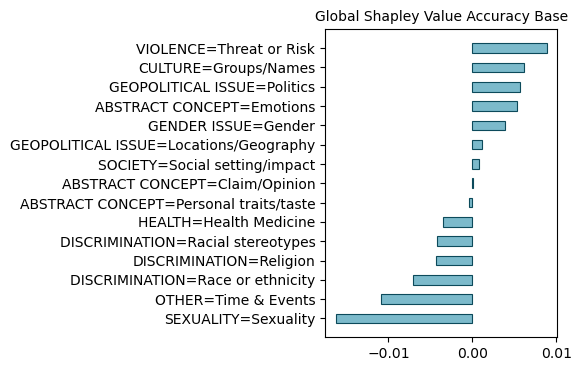

In [39]:
from divexplorer import DivergencePatternProcessor
ac_details = DivergencePatternProcessor(ac_fm, 'ac')

# We can pick a pattern
pattern = ac_details.patterns['itemset'].iloc[0]

gsv = ac_details.global_shapley_value()

ac_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value Accuracy Base')

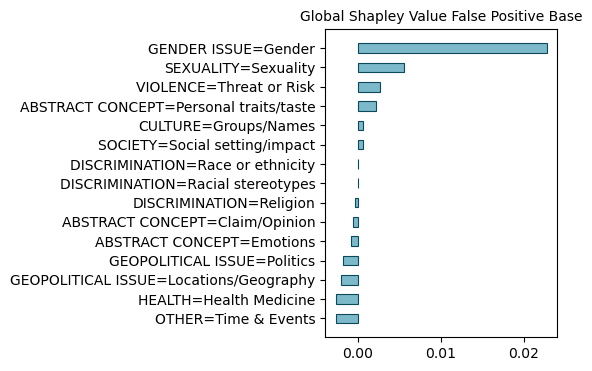

In [40]:
from divexplorer import DivergencePatternProcessor
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

# We can pick a pattern
pattern = fp_details.patterns['itemset'].iloc[0]

gsv = fp_details.global_shapley_value()
gsv
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value False Positive Base')

In [43]:
from divexplorer import DivergenceExplorer,DivergencePatternProcessor
from divexplorer.outcomes import get_false_negative_rate_outcome

final_df= pd.merge(topics_and_labels, predictions, on='text', how='inner')
print(len(final_df))


final_df = final_df.drop_duplicates(subset='text')

final_df = final_df.drop(columns=['label_y', 'Unnamed: 0','sentence_number_y'])
final_df.head()

final_df['label'] = final_df['label'].apply(lambda x: 0 if x == 'nothate' else 1)

y_trues = final_df["label"]
y_preds = final_df["prediction"]

final_df['fn'] =  get_false_negative_rate_outcome(y_trues, y_preds)


fn_diver = DivergenceExplorer(final_df)

attributes = ['TECHNOLOGY', 'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH','LEGALITY', 'SEXUALITY', 
              'GENDER ISSUE','ABSTRACT CONCEPT', 'DISCRIMINATION','GEOPOLITICAL ISSUE', 'OTHER']
FN_fm = fn_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fn'])
FN_fm = FN_fm.sort_values(by="fn_div", ascending=False, ignore_index=True)
fp_details = DivergencePatternProcessor(FP_fm, 'fp')

# We can pick a pattern
pattern = fp_details.patterns['itemset'].iloc[0]
print(pattern)

# and compute the Shapley value of the items.
sv = fp_details.shapley_value(pattern)
FN_fm

12958
frozenset({'GENDER ISSUE=Gender'})


,support,itemset,fn,fn_div,fn_t,length,support_count
0,0.075272,(OTHER=Time & Events),0.885950,0.090630,6.466690,1,968.0
1,0.067418,(DISCRIMINATION=Religion),0.872792,0.077472,5.136259,1,867.0
2,0.201711,(DISCRIMINATION=Race or ethnicity),0.862735,0.067415,7.335198,1,2594.0
3,0.058787,(HEALTH=Health Medicine),0.859189,0.063869,3.517878,1,756.0
4,0.071384,(GEOPOLITICAL ISSUE=Politics),0.854701,0.059381,2.953925,1,918.0
5,0.050622,(DISCRIMINATION=Racial stereotypes),0.844037,0.048717,2.616579,1,651.0
6,0.053421,(GEOPOLITICAL ISSUE=Locations/Geography),0.843478,0.048158,2.293828,1,687.0
7,0.051633,(ABSTRACT CONCEPT=Emotions),0.840376,0.045056,1.640733,1,664.0
8,0.056454,(SEXUALITY=Sexuality),0.830409,0.035089,1.963033,1,726.0
9,0.058709,(CULTURE=Groups/Names),0.825153,0.029833,1.294191,1,755.0


frozenset({'OTHER=Time & Events'})


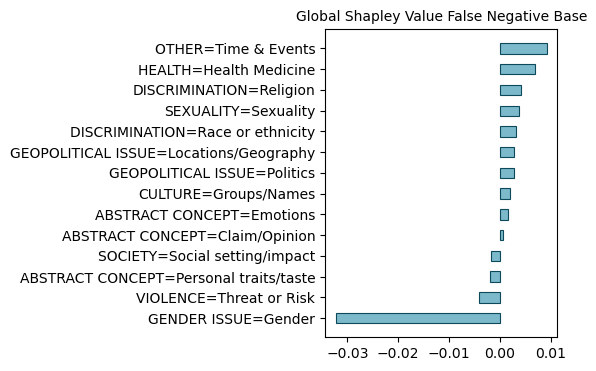

In [11]:
from divexplorer import DivergencePatternProcessor
fn_details = DivergencePatternProcessor(FN_fm, 'fn')

# We can pick a pattern
pattern = fn_details.patterns['itemset'].iloc[0]
print(pattern)

gsv = fn_details.global_shapley_value()
fn_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value False Negative Base')